In [5]:
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score, recall_score, f1_score, r2_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from numpy.testing import assert_almost_equal

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Which gender is prone to high charges?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


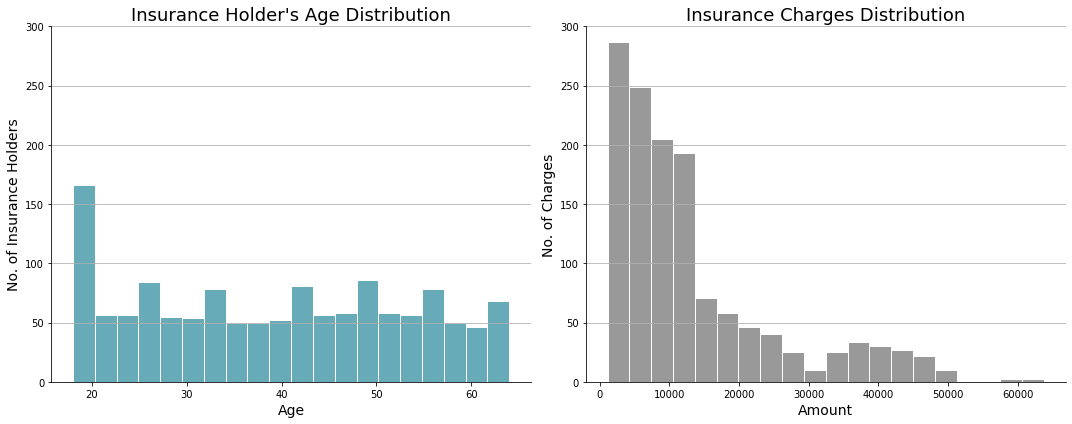

In [19]:
fig = plt.figure(figsize=(15, 6))

ax = fig.add_subplot(1,2,1)

df['age'].hist(ax=ax, bins=20, edgecolor='w', color='#68abb8')
ax.set_title('Insurance Holder\'s Age Distribution', fontsize=18)
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('No. of Insurance Holders', fontsize=14)
ax.set_ylim([0, 300]) 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(False)

ax2 = fig.add_subplot(1,2,2)

df['charges'].hist(ax=ax2, bins=20, edgecolor='w', color='#999999')
ax2.set_title('Insurance Charges Distribution', fontsize=18)
ax2.set_xlabel('Amount', fontsize=14)
ax2.set_ylabel('No. of Charges', fontsize=14)
ax2.set_ylim([0, 300]) 
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.xaxis.grid(False)
fig.savefig("figures/age_and_charges_distribution.png")

plt.tight_layout() 
